In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
fake = pd.read_csv('Fake.csv')
true = pd.read_csv('True.csv')
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [3]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [7]:
fake.describe()

,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


In [6]:
true.describe()

,title,text,subject,date
count,21417,21417,21417,21417
unique,20826,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017"
freq,14,8,11272,182


In [4]:
fake.duplicated().sum()
print(len(fake))
fake = fake.drop_duplicates(['title','text'])
len(fake)

23481


17908

In [5]:
true.duplicated().sum()
print(len(true))
true = true.drop_duplicates(['title','text'])
len(true)

21417


21197

In [6]:
true.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [7]:
fake.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [8]:
fake.groupby('subject').describe()

title         \
                count unique   
subject                        
Government News   532    532   
News             9050   9049   
US_News           783    783   
left-news         705    705   
politics         6838   6834   

                                                                         text  \
                                                               top freq count   
subject                                                                         
Government News  (VIDEO)INCREDIBLE ACCOUNT FROM SHERIFF MICHAEL...    1   532   
News              McConnell Says He’ll Obstruct ANY Effort To H...    2  9050   
US_News          THOUGHT POLICE: US Border Control Wants to Stu...    1   783   
left-news        SICKENING: ANGRY BLACK STUDENT Spray Paints RA...    1   705   
politics         MEDIA IGNORES Time That Bill Clinton FIRED His...    3  6838   

                                                                           \
                unique                                                top   
subject                                                                     
Government News    515                                                      
News              9050  Donald Trump called Atlanta a  crime infested ...   
US_News            783  21st Century Wire says More evidence of collus...   
left-news          685                                                      
politics          6425                                                      

                      date                                 
                freq count unique                top freq  
subject                                                    
Government News   17   532    374       Jul 17, 2015    5  
News               1  9050    723  February 16, 2016   32  
US_News            1   783    472   January 17, 2017    5  
left-news         21   705    472        Jul 8, 2016   11  
politics         406  6838   1009        Oct 9, 2016   16

In [9]:
true.groupby('subject').describe()

title                                                            \
              count unique                                                top   
subject                                                                         
politicsNews  11217  11150  Factbox: Trump fills top jobs for his administ...   
worldnews      9980   9946  Factbox: International reaction to arrest of R...   

                    text         \
             freq  count unique   
subject                           
politicsNews   14  11217  11214   
worldnews       6   9980   9978   

                                                                       date  \
                                                            top freq  count   
subject                                                                       
politicsNews  WASHINGTON (Reuters) - U.S. Representative Mar...    2  11217   
worldnews     BEIRUT (Reuters) - The battle for the city of ...    2   9980   

                                             
             unique                top freq  
subject                                      
politicsNews    716  November 9, 2016   115  
worldnews       129  December 6, 2017   138

In [10]:
true.count()

title      21197
text       21197
subject    21197
date       21197
dtype: int64

In [11]:
fake.count()

title      17908
text       17908
subject    17908
date       17908
dtype: int64

In [12]:
fake['fake'] = 1
true['fake'] = 0

In [13]:
merge = pd.merge(fake, true, how='outer')
df = merge.copy()
df = df.sample(frac=1)
df.reset_index()

,index,title,text,subject,date,fake
0,24908,Trump considers retired General Petraeus as to...,WASHINGTON (Reuters) - Donald Trump will meet ...,politicsNews,"November 28, 2016",0
1,4751,What Trump Just Said About His Tax Returns Wi...,It s hard to imagine that Donald Trump could g...,News,"September 6, 2016",1
2,10846,BOOM! JUDGE NAPOLITANO: The ONLY Crime Committ...,This is one of the best accounts we ve seen of...,politics,"May 18, 2017",1
3,4628,Whiny Trump Lashes Out Like A Toddler At Past...,Donald Trump is likely pleasing the GOP establ...,News,"September 15, 2016",1
4,28070,Trump's 'love' for Israel still not quite requ...,JERUSALEM (Reuters) - “I love the people in th...,politicsNews,"March 22, 2016",0
...,...,...,...,...,...,...
39100,29430,Catalan separatists seen in position to keep m...,MADRID (Reuters) - Pro-independence parties in...,worldnews,"December 21, 2017",0
39101,19875,Kremlin says got Trump adviser email about tow...,MOSCOW (Reuters) - Russian President Vladimir ...,politicsNews,"August 30, 2017",0
39102,29010,"As Obama pushes agenda, Texas leads legal push...","AUSTIN, Texas (Reuters) - Among the few certai...",politicsNews,"January 21, 2016",0
39103,28098,White House says has shared lists of political...,HAVANA (Reuters) - Cuba has political prisoner...,politicsNews,"March 21, 2016",0


In [14]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39105 entries, 0 to 39104
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    39105 non-null  object
 1   text     39105 non-null  object
 2   subject  39105 non-null  object
 3   date     39105 non-null  object
 4   fake     39105 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.8+ MB


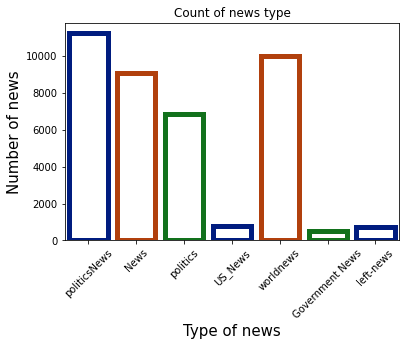

In [15]:
ax = sns.countplot(x="subject", data=df,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
#Setting labels and font size
ax.set(xlabel='Type of news', ylabel='Number of news',title='Count of news type')
ax.xaxis.get_label().set_fontsize(15)
plt.xticks(rotation=45)
ax.yaxis.get_label().set_fontsize(15)

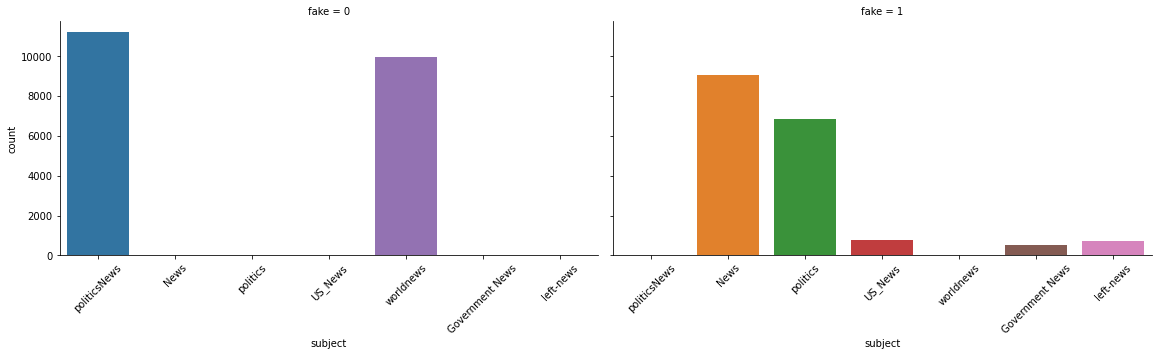

In [16]:
g = sns.catplot(x="subject", col="fake",
                data=df, kind="count",
                height=4, aspect=2)

#Rotating the xlabels
g.set_xticklabels(rotation=45)

In [17]:
df = df.drop(['subject','date'], axis=1)

In [19]:
x=df.iloc[:,:-1].values 
y=df.iloc[:,-1].values
print(x[0])
print(y[0])

['Trump considers retired General Petraeus as top diplomat: Bloomberg'
 'WASHINGTON (Reuters) - Donald Trump will meet with retired U.S. General David Petraeus on Monday as the president-elect considers him to serve as U.S. secretary of state, Bloomberg reported, citing a senior official with Trump’s transition team. Petraeus, a former CIA director who resigned in 2012 after it emerged he had an extra-marital affair, has indicated that he would serve in Trump’s administration if asked. ']
0


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv_body=CountVectorizer(max_features=5000)
body=cv_body.fit_transform(x[:,-1]).todense() #text
cv_head=CountVectorizer(max_features=5000)
head=cv_head.fit_transform(x[:,0]).todense() #title
X=np.hstack((head,body))

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
tree=DecisionTreeClassifier(criterion='entropy')
tree.fit(X_train,y_train)
predTree=tree.predict(X_test)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.9945448346403001


In [23]:
predTree[2]

0

In [24]:
y_test[2]

0

In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predTree)

array([[6225,   22],
       [  42, 5443]], dtype=int64)

In [26]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=5, random_state=42)
clf.fit(X_train, y_train)
predForest = clf.predict(X_test)
print("Random Forest's Accuracy: ", metrics.accuracy_score(y_test, predForest))

Random Forest's Accuracy:  0.9509887487214456


In [27]:
confusion_matrix(y_test,predForest)

array([[6024,  223],
       [ 352, 5133]], dtype=int64)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=7)
neigh.fit(X_train,y_train)
y_hat = neigh.predict(X_test)
print(metrics.accuracy_score(y_test,y_hat))

0.8868053187862257


In [29]:
confusion_matrix(y_test,y_hat)

array([[5925,  322],
       [1006, 4479]], dtype=int64)